[Back to Index](../index.html)

# Outliers in Data Science


### What is an Outlier?
An `outlier` is a data point that is significantly different from the other data points in a dataset. It can be due to variability in the measurement or it may indicate an experimental error. Outliers can occur by chance in any distribution, but they are often indicative either of measurement error or that the population has a heavy-tailed distribution.

### What is the Use of Identifying Outliers?
Identifying outliers is crucial for the following reasons:
- **Accuracy**: They can lead to serious errors in statistical analysis.
- **Data Quality**: Outliers may indicate a data quality issue.
- **Interesting Insights**: In some cases, outliers can be the most interesting part of the study (e.g., in fraud detection).

### What are the Limitations of Outlier Detection?
- **Subjectivity**: There's no precise way to define and identify outliers in all contexts.
- **Data Loss**: Removing outliers might lead to loss of valuable information.
- **Misinterpretation**: Incorrectly identifying outliers may lead to wrong conclusions.

### Real World Applications
- **Finance**: Identifying fraudulent transactions.
- **Healthcare**: Detecting anomalies in patient's health records.
- **Engineering**: Identifying flaws or errors in manufacturing processes.

## Detection Methods:
1. **Standard Deviation**: Points that lie beyond a certain number of standard deviations from the mean.
   - Rule of thumb: Data points outside 3 standard deviations are considered outliers.
2. **Interquartile Range (IQR)**: 
   - IQR = Q3 - Q1 (75th percentile - 25th percentile).
   - Outliers typically outside 1.5 * IQR above the third quartile and below the first quartile.
3. **Box Plots**: Visualize the distribution and identify outliers with whiskers.
4. **Scatter Plots**: Help visualize outliers in the context of the data.
5. **Z-Score**: Measures the number of standard deviations a point is from the mean.
6. **DBSCAN Clustering**: Identifies outliers as points in low-density regions.

### Interesting Questions:
1. How can we identify outliers in a dataset?
    * Visual Inspection: Boxplots or scatter plots to visually identify points that fall far from the rest of the data
    * Statistical tests: Z-score or IQR method, where data points that fall outside 3 standard deviations from the mean or 1.5 times the IQR from the quartiles are considered outliers.
2. What are the methods to deal with outliers?
    * Remove them: If they are errors or significantly distort the analysis
    * Adjust them: Using methods like Winsorization, where extreme values are replaced with the nearest non-outlier values.
    * Use robust statistical methods: that are less sensitive to outliers, like median or quantile regression.
3. What is the impact of outliers on linear regression?
    * Influencing the slope: A single outlier can change the slope of the regression line, affecting the model's prediction.
    * Affecting assumptions: Outliers can violate the assumptions of normality and homoscedasticity leading to incorrect conclusions.
4. How does outlier detection differ for univariate vs multivariate analysis?
    * Univariate detection: Looks at one variable at a time and identifies extreme values based on that single variable.
    * Multivariate detection: Considers the relationship between multiple variables and identifies outliers that are unusual combinations of variable scores.
         * Techniques like Mahalanobis distance can be used to detect multivariate outliers, which measure the distance of a data point from the centroid of other cases based on multiple variables.[check this](https://www.statisticssolutions.com/univariate-and-multivariate-outliers/)
5. What are the pros and cons of removing outliers from the data?
    * Pros: Removing outliers can lead to a more accurate model, especially if the outliers are due to errors or are not representative of the population.
    * Cons: Removing outliers can also remove valuable information, especially if the outliers are genuine and represent important variations in the data. It can also lead to biased results if not done carefully

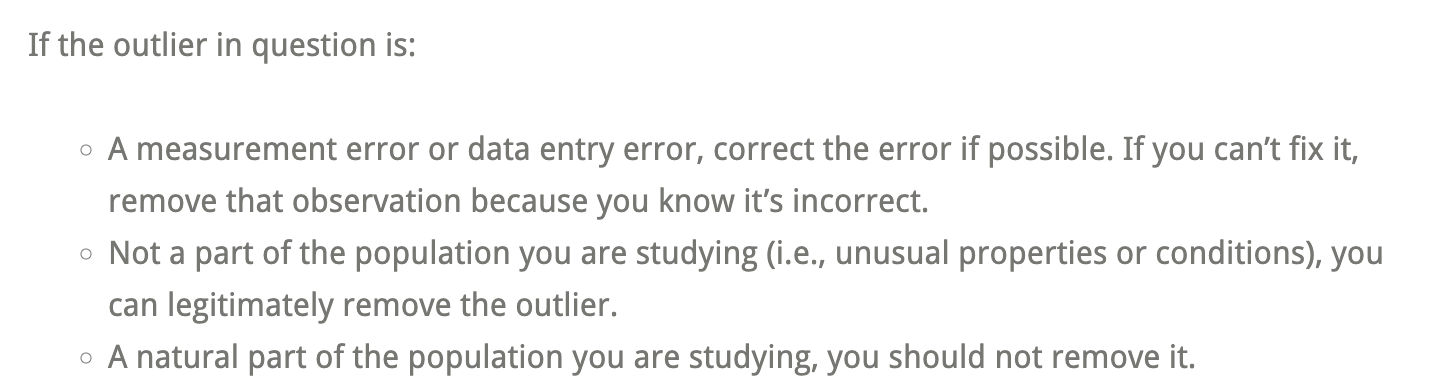

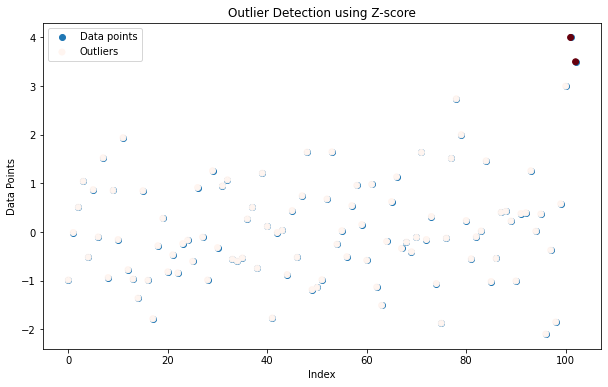

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generating random data
data = np.random.normal(0, 1, 100)
data = np.append(data, [3, 4, 3.5])  # Adding outliers

# Detecting outliers
z_scores = np.abs(stats.zscore(data))
outliers = data[z_scores > 3]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, label='Data points')
plt.scatter(range(len(data)), data, c=(z_scores > 3), label='Outliers', cmap='Reds')
plt.legend()
plt.title('Outlier Detection using Z-score')
plt.xlabel('Index')
plt.ylabel('Data Points')
plt.show()

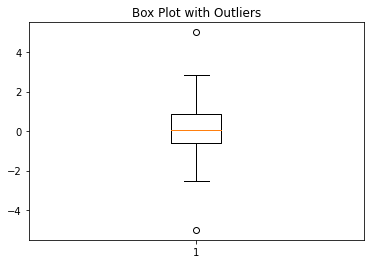

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = np.random.normal(0, 1, 100)
data = np.append(data, [5, -5])  # Adding outliers

# Calculate IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Determine outliers
outliers = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR)))]

# Plot
plt.boxplot(data)
plt.title('Box Plot with Outliers')
plt.show()


- [Scribbr's guide on outliers](https://www.scribbr.com/statistics/outliers/) provides a comprehensive explanation and examples.
- [FreeCodeCamp's article](https://www.freecodecamp.org/news/what-is-an-outlier-definition-and-how-to-find-outliers-in-statistics/) on detecting outliers using the interquartile range